<a href="https://colab.research.google.com/github/kenextra/IBM-MLCert/blob/main/Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine Learning

## Sections required in your report:

1. Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.

2. Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

3. Brief summary of data exploration and actions taken for data cleaning orfeature engineering.

4. Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.

5. A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.

6. Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

7. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

## The grading will center around 5 main points:
1.    Does the report include a section describing the data?

2.    Does the report include a paragraph detailing the main objective(s) of this analysis?  

3.    Does the report include a section with variations of Unsupervised Learning models and specifies which one is the model that best suits the main objective(s) of this analysis?

4.    Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?

5.    Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different modeling techniques? 

# General Section

In [ ]:
# install and reset runtime
!pip install --upgrade pandas --quiet
!pip install --upgrade scikit-learn --quiet
!pip install pyproj --quiet

     |████████████████████████████████| 11.3 MB 27 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.
     |████████████████████████████████| 22.3 MB 32 kB/s 
     |████████████████████████████████| 6.6 MB 14.2 MB/s 


## Import needed libraries

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
# from collections import OrderedDict
from matplotlib.gridspec import GridSpec
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
pd.__version__

'1.3.2'

In [ ]:
import os
import urllib.request
from zipfile import ZipFile
from pathlib import Path
from import_dataset import (load_data, basic_preprocessing,
                            add_dayof_week, add_timeof_day,
                            add_crow_direction, add_avespeed)

## Download Data

In [ ]:
DATA_URL = "https://www.mathworks.com/supportfiles/practicaldsmatlab/taxi/Taxi%20Data.zip"
DATA_NAME = "TaxiData.zip"
urllib.request.urlretrieve(DATA_URL, DATA_NAME)

('TaxiData.zip', <http.client.HTTPMessage at 0x7f1c62157750>)

In [ ]:
# Create a ZipFile Object and load data in it
with ZipFile(DATA_NAME, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
DATA_DIR = Path.cwd() / 'Taxi Data'
DATA_DIR

PosixPath('/content/Taxi Data')

## Import and Explore Data

In [ ]:
col_names = ["Vendor", "PickupTime", "DropoffTime", "Passengers", "Distance", "PickupLon", "PickupLat",
             "RateCode", "HeldFlag", "DropoffLon", "DropoffLat", "PayType", "Fare", "ExtraCharge", "Tax",
             "Tip", "Tolls", "ImpSurcharge", "TotalCharge"];

In [ ]:
use_cols = ['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'RateCodeID',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

parse_dates = ["tpep_pickup_datetime", "tpep_dropoff_datetime"]

In [ ]:
dtype = {'RateCodeID': str, 'payment_type': str, 'VendorID': str, 'RatecodeID': str,}  # , dtype=dtype

In [ ]:
df = load_data(path_dir=DATA_DIR, parse_dates=parse_dates, 
                     usecols=use_cols, dtype=dtype,
                      file_substr='yellow', skiprows=1, preprocess=True)

Loading all yellow*.csv in /content/Taxi Data folder...

Converting categorical features to their corresponding values...

Removing invalid charges...

Removing invalid trip information...

Keep trips with pickup and drop off locations inside the region of interest

Adding new features: Duration...

Only keep trips with typical values..



In [ ]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823895 entries, 0 to 2823894
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               2823895 non-null  object        
 1   tpep_pickup_datetime   2823895 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  2823895 non-null  datetime64[ns]
 3   passenger_count        2823895 non-null  int64         
 4   trip_distance          2823895 non-null  float64       
 5   pickup_longitude       2823895 non-null  float64       
 6   pickup_latitude        2823895 non-null  float64       
 7   RateCodeID             2823895 non-null  object        
 8   store_and_fwd_flag     2823895 non-null  object        
 9   dropoff_longitude      2823895 non-null  float64       
 10  dropoff_latitude       2823895 non-null  float64       
 11  payment_type           2823895 non-null  object        
 12  fare_amount            28238

In [ ]:
df.shape

(2823895, 20)

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,"Creative Mobile Technologies, LLC",2015-09-01 00:06:48,2015-09-01 00:20:31,1,6.70,-73.982323,40.771919,Standard rate,N,-73.938919,40.844841,Credit card,20.0,0.5,0.5,4.26,0.00,0.3,25.56,13.716667
1,VeriFone Inc.,2015-09-01 00:14:18,2015-09-01 00:24:47,1,4.47,-73.782097,40.644711,Standard rate,N,-73.770470,40.681171,Credit card,14.5,0.5,0.5,3.95,0.00,0.3,19.75,10.483333
2,"Creative Mobile Technologies, LLC",2015-09-01 00:14:35,2015-09-01 00:26:36,1,2.10,-73.982086,40.772179,Standard rate,N,-73.965210,40.763660,Credit card,10.5,0.5,0.5,2.95,0.00,0.3,14.75,12.016667
3,VeriFone Inc.,2015-09-01 00:14:35,2015-09-01 00:18:46,1,1.40,-73.971306,40.757439,Standard rate,N,-73.978317,40.741573,Credit card,6.0,0.5,0.5,1.46,0.00,0.3,8.76,4.183333
4,VeriFone Inc.,2015-09-01 00:07:46,2015-09-01 00:29:31,1,8.86,-73.872940,40.773979,Standard rate,N,-73.982048,40.755470,Credit card,27.0,0.5,0.5,6.77,5.54,0.3,40.61,21.750000


In [ ]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
2823890,"Creative Mobile Technologies, LLC",2015-06-30 21:53:15,2015-06-30 22:06:56,1,2.00,-73.982529,40.767773,Standard rate,N,-73.976379,40.743858,Credit card,10.5,0.5,0.5,0.75,0.0,0.3,12.55,13.683333
2823891,"Creative Mobile Technologies, LLC",2015-06-30 21:54:06,2015-06-30 22:08:26,1,2.20,-73.970215,40.757469,Standard rate,N,-73.991066,40.738388,Credit card,11.0,0.5,0.5,2.45,0.0,0.3,14.75,14.333333
2823892,VeriFone Inc.,2015-06-30 21:54:20,2015-06-30 21:59:27,1,0.97,-73.977264,40.752899,Standard rate,N,-73.979179,40.761707,Cash,5.5,0.5,0.5,0.00,0.0,0.3,6.80,5.116667
2823893,VeriFone Inc.,2015-06-30 21:54:20,2015-06-30 22:20:37,5,5.70,-74.009521,40.719913,Standard rate,N,-73.967369,40.764351,Credit card,22.0,0.5,0.5,4.66,0.0,0.3,27.96,26.283333
2823894,VeriFone Inc.,2015-06-30 21:54:08,2015-06-30 21:58:48,5,1.05,-73.991890,40.750622,Standard rate,N,-74.003311,40.742554,Cash,5.5,0.5,0.5,0.00,0.0,0.3,6.80,4.666667


In [ ]:
df = add_timeof_day(df)
# df.head()

In [ ]:
df = add_dayof_week(df)
# df.head()

In [ ]:
df = add_avespeed(df)
# df.head()

In [ ]:
corr_matrix = df.corr()
corr_matrix['duration'].sort_values(ascending=False).to_frame()

,duration
duration,1.000000
fare_amount,0.888203
total_amount,0.862494
trip_distance,0.781401
tip_amount,0.493078
tolls_amount,0.457660
pickup_longitude,0.370568
dropoff_longitude,0.266498
ave_speed,0.159938
time_of_day,0.032376


## Choose target and feature variables/columns

In [ ]:
# Extract features base on above correlation
label = ['duration']
# 1. without amount
features1 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', ]
# 2. without amount + 3 new features (1 categorical variable)
features2 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'time_of_day', 'day_of_week', 'ave_speed', ]
# 3. Above abs(0.1)
features3 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount', 'ave_speed',  ]
# 4. Above abs(0.1) + 2 new features (1 categorical variable)
features4 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount', 'extra',
             'mta_tax', 'time_of_day', 'day_of_week', 'ave_speed', ]
# 5. all features i.e 5 categorical features
all_features = list(set(df.columns.to_list()) - set(label + ['tpep_pickup_datetime', 'tpep_dropoff_datetime',]))

# General sklearn imports

In [ ]:
from sklearn import set_config
set_config(display="diagram")
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, PolynomialFeatures, MinMaxScaler

# Train, Val, Split

In [ ]:
features = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount', 'extra',
             'mta_tax', 'time_of_day', 'day_of_week', 'ave_speed', ]

In [ ]:
len(features)

14

In [ ]:
y = df[label]
X = df[features]

In [ ]:
X.head()

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,total_amount,tip_amount,tolls_amount,extra,mta_tax,time_of_day,day_of_week,ave_speed
0,6.70,-73.982323,40.771919,-73.938919,40.844841,20.0,25.56,4.26,0.00,0.5,0.5,0.113333,Tuesday,29.307412
1,4.47,-73.782097,40.644711,-73.770470,40.681171,14.5,19.75,3.95,0.00,0.5,0.5,0.238333,Tuesday,25.583466
2,2.10,-73.982086,40.772179,-73.965210,40.763660,10.5,14.75,2.95,0.00,0.5,0.5,0.243056,Tuesday,10.485437
3,1.40,-73.971306,40.757439,-73.978317,40.741573,6.0,8.76,1.46,0.00,0.5,0.5,0.243056,Tuesday,20.079681
4,8.86,-73.872940,40.773979,-73.982048,40.755470,27.0,40.61,6.77,5.54,0.5,0.5,0.129444,Tuesday,24.441379


In [ ]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.4, random_state=42)
print(f'Train data shape: {X_train.shape}\n')
print(f'Validation data shape: {X_val.shape}\n')
print(f'Test data shape: {X_test.shape}\n')

Train data shape: (1694220, 14)

Validation data shape: (677688, 14)

Test data shape: (451793, 14)



# General Transformers

## Transform label variable

In [ ]:
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c47516510>]],
      dtype=object)

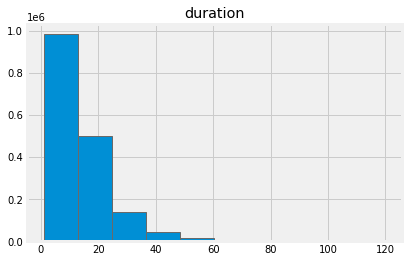

In [ ]:
y_train.hist()

In [ ]:
normaltest(y_train.values.ravel())

NormaltestResult(statistic=795277.4094709733, pvalue=0.0)

NormaltestResult(statistic=6257.590081448247, pvalue=0.0)

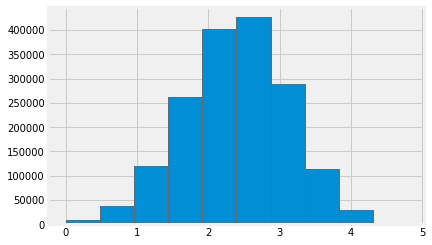

In [ ]:
plt.hist(np.log(y_train.values.ravel()))
normaltest(np.log(y_train.values.ravel()))

NormaltestResult(statistic=215302.6760732004, pvalue=0.0)

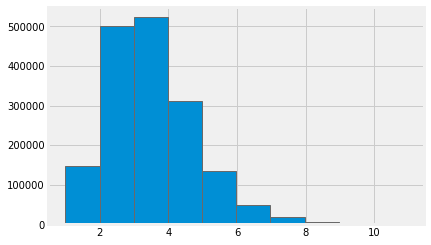

In [ ]:
plt.hist(np.sqrt(y_train.values.ravel()))
normaltest(np.sqrt(y_train.values.ravel()))

NormaltestResult(statistic=5370.875551068667, pvalue=0.0)

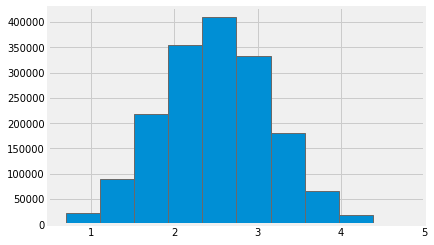

In [ ]:
plt.hist(np.log1p(y_train.values.ravel()))
normaltest(np.log1p(y_train.values.ravel()))

## Build categorical and numerical pipeline



## Preprocess Features --> Scaling and encoding

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

In [ ]:
numerical_cols, categorical_cols

(Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
        'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
        'ave_speed'],
       dtype='object'), Index(['day_of_week'], dtype='object'))

In [ ]:
num_pipeline = Pipeline([("num", MinMaxScaler()),
                          ("pca", PCA(n_components=11,random_state=42)),
                          ("poly", PolynomialFeatures(degree=2)),
                         ])
num_pipeline

Pipeline(steps=[('num', MinMaxScaler()),
                ('pca', PCA(n_components=11, random_state=42)),
                ('poly', PolynomialFeatures())])

In [ ]:
cat_pipeline = Pipeline([("cat", OrdinalEncoder()),
                         ])
cat_pipeline

Pipeline(steps=[('cat', OrdinalEncoder())])

In [ ]:
transformer = ColumnTransformer([
                 ("num_pipe", num_pipeline, numerical_cols),
                 ("cat_pipe", cat_pipeline, categorical_cols),
                 ])
transformer

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('num', MinMaxScaler()),
                                                 ('pca',
                                                  PCA(n_components=11,
                                                      random_state=42)),
                                                 ('poly',
                                                  PolynomialFeatures())]),
                                 Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                ('cat_pipe',
                                 Pipeline(steps=[('cat', OrdinalEncoder())]),
                                 Index(['day_of_week'], dtype='object'))])

# Build Regression Model

## Grid search to find best number of components for PCA

In [ ]:
# Without ploynomial Features
estimator = Pipeline([('preparation', transformer), 
                     ('model', LinearRegression(n_jobs=-1))
                     ])

In [ ]:
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preparation', 'model', 'preparation__n_jobs', 'preparation__remainder', 'preparation__sparse_threshold', 'preparation__transformer_weights', 'preparation__transformers', 'preparation__verbose', 'preparation__num_pipe', 'preparation__cat_pipe', 'preparation__num_pipe__memory', 'preparation__num_pipe__steps', 'preparation__num_pipe__verbose', 'preparation__num_pipe__num', 'preparation__num_pipe__pca', 'preparation__num_pipe__poly', 'preparation__num_pipe__num__clip', 'preparation__num_pipe__num__copy', 'preparation__num_pipe__num__feature_range', 'preparation__num_pipe__pca__copy', 'preparation__num_pipe__pca__iterated_power', 'preparation__num_pipe__pca__n_components', 'preparation__num_pipe__pca__random_state', 'preparation__num_pipe__pca__svd_solver', 'preparation__num_pipe__pca__tol', 'preparation__num_pipe__pca__whiten', 'preparation__num_pipe__poly__degree', 'preparation__num_pipe__poly__include_bias', 'preparation__num_pipe__poly__interact

In [ ]:
# Set parameters
N_COMPONENTS = [7, 8, 10, 11, 12, 13]
params = {
    'preparation__num_pipe__pca__n_components': N_COMPONENTS,
    }
kf = KFold(shuffle=True, random_state=42, n_splits=10)

In [ ]:
grid = GridSearchCV(estimator, params, cv=kf, verbose=10, n_jobs=1,
                    scoring='neg_mean_squared_error',
                    return_train_score=True)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10; 1/6] START preparation__num_pipe__pca__n_components=7.................
[CV 1/10; 1/6] END preparation__num_pipe__pca__n_components=7;, score=(train=-9.562, test=-9.216) total time=  13.5s
[CV 2/10; 1/6] START preparation__num_pipe__pca__n_components=7.................
[CV 2/10; 1/6] END preparation__num_pipe__pca__n_components=7;, score=(train=-9.443, test=-9.466) total time=  12.6s
[CV 3/10; 1/6] START preparation__num_pipe__pca__n_components=7.................
[CV 3/10; 1/6] END preparation__num_pipe__pca__n_components=7;, score=(train=-9.515, test=-9.528) total time=  12.7s
[CV 4/10; 1/6] START preparation__num_pipe__pca__n_components=7.................
[CV 4/10; 1/6] END preparation__num_pipe__pca__n_components=7;, score=(train=-9.436, test=-9.070) total time=  12.8s
[CV 5/10; 1/6] START preparation__num_pipe__pca__n_components=7.................
[CV 5/10; 1/6] END preparation__num_pipe__pca__n_components=7;, sc

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('num',
                                                                                          MinMaxScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=11,
                                                                                              random_state=42)),
                                                                                         ('poly',
                                                                                          PolynomialFeatures())]),
                                                                         Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'drop...
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('cat',
                                                                                          OrdinalEncoder())]),
                                                                         Index(['day_of_week'], dtype='object'))])),
                                       ('model', LinearRegression(n_jobs=-1))]),
             n_jobs=1,
             param_grid={'preparation__num_pipe__pca__n_components': [7, 8, 10,
                                                                      11, 12,
                                                                      13]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=10)

In [ ]:
grid.best_score_, grid.best_params_

(-2.842103950596256, {'preparation__num_pipe__pca__n_components': 11})

In [ ]:
best_estimator = grid.best_estimator_
best_estimator

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('num',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=11,
                                                                       random_state=42)),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat',
                                                                   OrdinalEncoder())]),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model', LinearRegression(n_jobs=-1))])

In [ ]:
errors = list()

In [ ]:
# predict
y_train_pred = best_estimator.predict(X_train)
y_val_pred = best_estimator.predict(X_val)
y_test_pred = best_estimator.predict(X_test)

errors.append(pd.Series({'train': r2_score(y_train_pred, y_train),
           'val': r2_score(y_val_pred, y_val),
           'test' : r2_score(y_test_pred, y_test)},
          name='score_without_poly'))

errors.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred, squared=False),
           'val': mean_squared_error(y_val_pred, y_val, squared=False),
           'test' : mean_squared_error(y_test,  y_test_pred, squared=False)},
          name='rmse_without_poly'))

In [ ]:
pd.concat(errors, axis=1)

,score_without_poly,rmse_without_poly
train,0.974858,1.682308
val,0.974806,1.689984
test,0.973900,1.718650


In [ ]:
cvres = grid.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

3.0791135837469574 {'preparation__num_pipe__pca__n_components': 7}
2.611614617544481 {'preparation__num_pipe__pca__n_components': 8}
1.996706722567066 {'preparation__num_pipe__pca__n_components': 10}
1.6858540715602452 {'preparation__num_pipe__pca__n_components': 11}
134021.18360911653 {'preparation__num_pipe__pca__n_components': 12}
131985.36946024012 {'preparation__num_pipe__pca__n_components': 13}


In [ ]:
# So the best number of component is
n_components = grid.best_params_['preparation__num_pipe__pca__n_components']
n_components

11

## Build and test simple model

In [ ]:
errors = list()
scores = list()

### Base model (LR)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold

In [ ]:
base_num_pipeline = Pipeline([("num", MinMaxScaler()),
                          ("poly", PolynomialFeatures(degree=2)),
                         ])

base_cat_pipeline = Pipeline([("cat", OrdinalEncoder()),
                         ])

base_transformer = ColumnTransformer([
                 ("num_pipe", base_num_pipeline, numerical_cols),
                 ("cat_pipe", base_cat_pipeline, categorical_cols),
                 ])
base_transformer

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('num', MinMaxScaler()),
                                                 ('poly',
                                                  PolynomialFeatures())]),
                                 Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                ('cat_pipe',
                                 Pipeline(steps=[('cat', OrdinalEncoder())]),
                                 Index(['day_of_week'], dtype='object'))])

In [ ]:
base_model = Pipeline([('preparation', base_transformer), 
                     ('model', LinearRegression(n_jobs=1))
                     ])

In [ ]:
base_model.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('num',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat',
                                                                   OrdinalEncoder())]),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model', LinearRegression(n_jobs=1))])

In [ ]:
base_model.named_steps["model"].coef_[0].shape

(106,)

In [ ]:
base_model.n_features_in_

14

In [ ]:
base_model.named_steps.model.n_features_in_

106

In [ ]:
# predict
y_train_pred = base_model.predict(X_train)
y_val_pred = base_model.predict(X_val)
y_test_pred = base_model.predict(X_test)

# Inverse transform of boxcox
# y_train_pred = inv_boxcox(y_train_pred, lam)
# y_val_pred = inv_boxcox(y_val_pred, lam)
# y_test_pred = inv_boxcox(y_test_pred, lam)

# y_train_pred = np.expm1(y_train_pred)
# y_val_pred = np.expm1(y_val_pred)
# y_test_pred = np.expm1(y_test_pred)

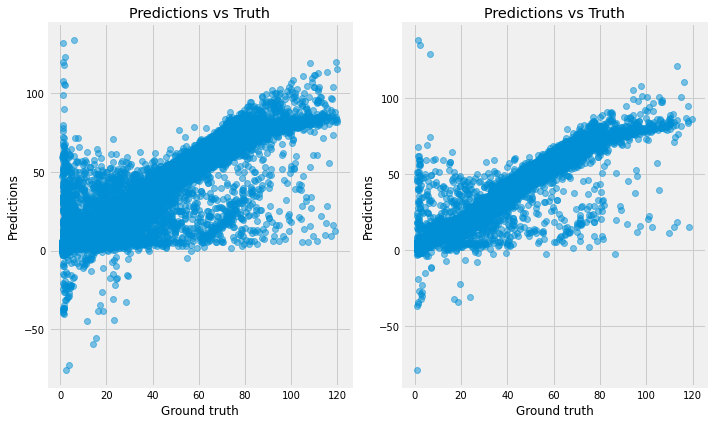

In [ ]:
fig, axList = plt.subplots(nrows=1, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 6)

# axList[-1].axis('off')
data = list()
data.append([y_train, y_train_pred])
# data.append([inv_boxcox(y_train,lam), y_train_pred])
# data.append([np.expm1(y_train), y_train_pred])
data.append([y_test, y_test_pred])
for ax, y_value in zip(axList, data):
    # ax.scatter(inv_boxcox(y_value[0], lam), y_value[1], alpha=.5)
    ax.scatter(y_value[0], y_value[1], alpha=.5)

    ax.set(xlabel='Ground truth', 
        ylabel='Predictions',
        title='Predictions vs Truth')
plt.tight_layout()

In [ ]:
errors.append(pd.Series({'train': r2_score(y_train, y_train_pred),
           'val': r2_score(y_val, y_val_pred,),
           'test' : r2_score( y_test, y_test_pred,)},
          name='base_model_score'))

errors.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred, squared=False),
           'val': mean_squared_error(y_val, y_val_pred, squared=False),
           'test' : mean_squared_error(y_test,  y_test_pred, squared=False)},
          name='base_model_rmse'))

pd.concat(errors, axis=1)

,base_model_score,base_model_rmse
train,0.975474,1.682308
val,0.975482,1.689984
test,0.974501,1.718651


### Linear Regression(First model)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold

In [ ]:
lr_estimator = Pipeline([('preparation', transformer), 
                     ('model', LinearRegression(n_jobs=1, ))
                     ])

In [ ]:
lr_estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preparation', 'model', 'preparation__n_jobs', 'preparation__remainder', 'preparation__sparse_threshold', 'preparation__transformer_weights', 'preparation__transformers', 'preparation__verbose', 'preparation__num_pipe', 'preparation__cat_pipe', 'preparation__num_pipe__memory', 'preparation__num_pipe__steps', 'preparation__num_pipe__verbose', 'preparation__num_pipe__num', 'preparation__num_pipe__pca', 'preparation__num_pipe__poly', 'preparation__num_pipe__num__clip', 'preparation__num_pipe__num__copy', 'preparation__num_pipe__num__feature_range', 'preparation__num_pipe__pca__copy', 'preparation__num_pipe__pca__iterated_power', 'preparation__num_pipe__pca__n_components', 'preparation__num_pipe__pca__random_state', 'preparation__num_pipe__pca__svd_solver', 'preparation__num_pipe__pca__tol', 'preparation__num_pipe__pca__whiten', 'preparation__num_pipe__poly__degree', 'preparation__num_pipe__poly__include_bias', 'preparation__num_pipe__poly__interact

In [ ]:
lr_estimator.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('num',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=11,
                                                                       random_state=42)),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat',
                                                                   OrdinalEncoder())]),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model', LinearRegression(n_jobs=1))])

In [ ]:
lr_estimator.named_steps["model"].coef_[0].shape

(79,)

In [ ]:
lr_estimator.n_features_in_, lr_estimator.named_steps.model.n_features_in_

(14, 79)

In [ ]:
lr_estimator.named_steps.model.n_features_in_

79

In [ ]:
# predict
y_train_pred = lr_estimator.predict(X_train)
y_val_pred = lr_estimator.predict(X_val)
y_test_pred = lr_estimator.predict(X_test)

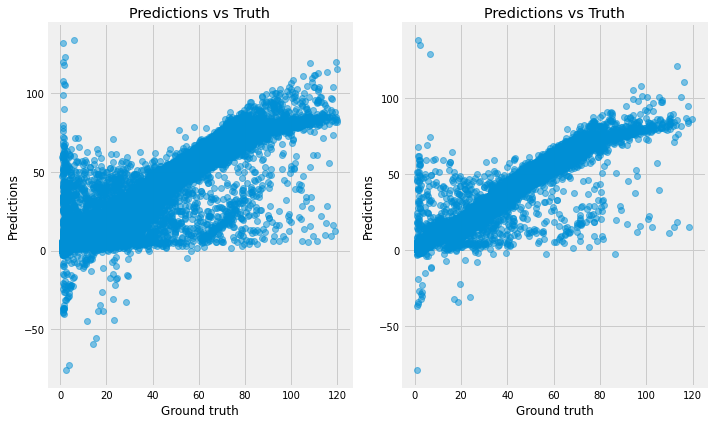

In [ ]:
fig, axList = plt.subplots(nrows=1, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 6)

# axList[-1].axis('off')

data = [[y_train, y_train_pred], [y_test, y_test_pred]]
for ax, y_value in zip(axList, data):
    ax.scatter(y_value[0], y_value[1], alpha=.5)

    ax.set(xlabel='Ground truth', 
        ylabel='Predictions',
        title='Predictions vs Truth')
plt.tight_layout()

In [ ]:
errors.append(pd.Series({'train': r2_score(y_train_pred, y_train),
           'val': r2_score(y_val_pred, y_val),
           'test' : r2_score(y_test_pred, y_test)},
          name='LR_score'))

errors.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred, squared=False),
           'val': mean_squared_error(y_val_pred, y_val, squared=False),
           'test' : mean_squared_error(y_test,  y_test_pred, squared=False)},
          name='LR_rmse'))

In [ ]:
pd.concat(errors, axis=1)

,base_model_score,base_model_rmse,LR_score,LR_rmse
train,0.975474,1.682308,0.974858,1.682308
val,0.975482,1.689984,0.974806,1.689984
test,0.974501,1.718651,0.973900,1.718650


### Ridge model

In [ ]:
# create pipeline
ridge_estimator = Pipeline([('preparation', transformer), 
                      ("ridge_regression", Ridge(alpha=0.05))
                      ])

In [ ]:
ridge_estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preparation', 'ridge_regression', 'preparation__n_jobs', 'preparation__remainder', 'preparation__sparse_threshold', 'preparation__transformer_weights', 'preparation__transformers', 'preparation__verbose', 'preparation__num_pipe', 'preparation__cat_pipe', 'preparation__num_pipe__memory', 'preparation__num_pipe__steps', 'preparation__num_pipe__verbose', 'preparation__num_pipe__num', 'preparation__num_pipe__pca', 'preparation__num_pipe__poly', 'preparation__num_pipe__num__clip', 'preparation__num_pipe__num__copy', 'preparation__num_pipe__num__feature_range', 'preparation__num_pipe__pca__copy', 'preparation__num_pipe__pca__iterated_power', 'preparation__num_pipe__pca__n_components', 'preparation__num_pipe__pca__random_state', 'preparation__num_pipe__pca__svd_solver', 'preparation__num_pipe__pca__tol', 'preparation__num_pipe__pca__whiten', 'preparation__num_pipe__poly__degree', 'preparation__num_pipe__poly__include_bias', 'preparation__num_pipe__pol

In [ ]:
ridge_estimator.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('num',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=11,
                                                                       random_state=42)),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat',
                                                                   OrdinalEncoder())]),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('ridge_regression', Ridge(alpha=0.05))])

In [ ]:
ridge_estimator.n_features_in_, ridge_estimator.named_steps.ridge_regression.n_features_in_

(14, 79)

In [ ]:
# predict
y_train_pred = ridge_estimator.predict(X_train)
y_val_pred = ridge_estimator.predict(X_val)
y_test_pred = ridge_estimator.predict(X_test)

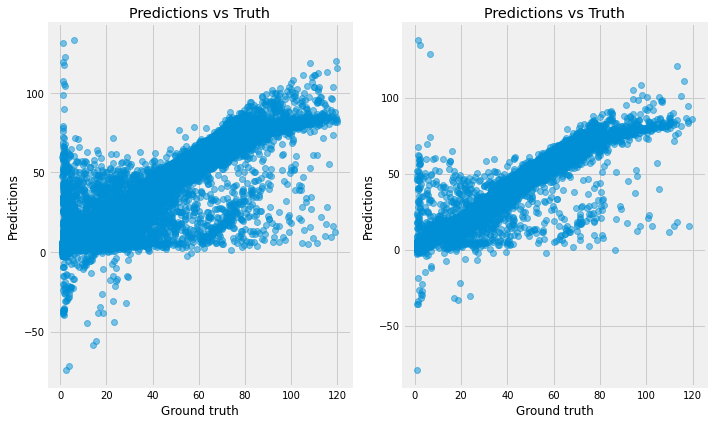

In [ ]:
fig, axList = plt.subplots(nrows=1, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 6)

# axList[-1].axis('off')

data = [[y_train, y_train_pred], [y_test, y_test_pred]]
for ax, y_value in zip(axList, data):
    ax.scatter(y_value[0], y_value[1], alpha=.5)

    ax.set(xlabel='Ground truth', 
        ylabel='Predictions',
        title='Predictions vs Truth')
plt.tight_layout()

In [ ]:
errors.append(pd.Series({'train': r2_score(y_train_pred, y_train),
           'val': r2_score(y_val_pred, y_val),
           'test' : r2_score(y_test_pred, y_test)},
          name='Ridge_score'))

errors.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred, squared=False),
           'val': mean_squared_error(y_val_pred, y_val, squared=False),
           'test' : mean_squared_error(y_test,  y_test_pred, squared=False)},
          name='Ridge_rmse'))

pd.concat(errors, axis=1)

,base_model_score,base_model_rmse,LR_score,LR_rmse,Ridge_score,Ridge_rmse
train,0.975474,1.682308,0.974858,1.682308,0.974853,1.682334
val,0.975482,1.689984,0.974806,1.689984,0.974793,1.690284
test,0.974501,1.718651,0.973900,1.718650,0.973905,1.718381


### LinearSVR

In [ ]:
from sklearn.svm import LinearSVR

In [ ]:
# create pipeline
svr_estimator = Pipeline([('preparation', transformer), 
                      ("svr", LinearSVR(C=1.0, max_iter=1500, tol=1e-3))
                      ])

In [ ]:
svr_estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preparation', 'svr', 'preparation__n_jobs', 'preparation__remainder', 'preparation__sparse_threshold', 'preparation__transformer_weights', 'preparation__transformers', 'preparation__verbose', 'preparation__num_pipe', 'preparation__cat_pipe', 'preparation__num_pipe__memory', 'preparation__num_pipe__steps', 'preparation__num_pipe__verbose', 'preparation__num_pipe__num', 'preparation__num_pipe__pca', 'preparation__num_pipe__poly', 'preparation__num_pipe__num__clip', 'preparation__num_pipe__num__copy', 'preparation__num_pipe__num__feature_range', 'preparation__num_pipe__pca__copy', 'preparation__num_pipe__pca__iterated_power', 'preparation__num_pipe__pca__n_components', 'preparation__num_pipe__pca__random_state', 'preparation__num_pipe__pca__svd_solver', 'preparation__num_pipe__pca__tol', 'preparation__num_pipe__pca__whiten', 'preparation__num_pipe__poly__degree', 'preparation__num_pipe__poly__include_bias', 'preparation__num_pipe__poly__interactio

In [ ]:
svr_estimator.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('num',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=11,
                                                                       random_state=42)),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat',
                                                                   OrdinalEncoder())]),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('svr', LinearSVR(max_iter=1500, tol=0.001))])

In [ ]:
svr_estimator.n_features_in_, svr_estimator.named_steps.svr.n_features_in_

(14, 79)

In [ ]:
# predict
y_train_pred = svr_estimator.predict(X_train)
y_val_pred = svr_estimator.predict(X_val)
y_test_pred = svr_estimator.predict(X_test)

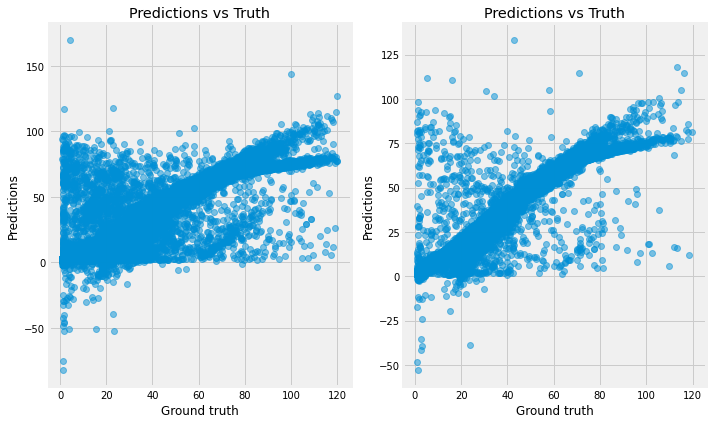

In [ ]:
fig, axList = plt.subplots(nrows=1, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 6)

# axList[-1].axis('off')

data = [[y_train, y_train_pred], [y_test, y_test_pred]]
for ax, y_value in zip(axList, data):
    ax.scatter(y_value[0], y_value[1], alpha=.5)

    ax.set(xlabel='Ground truth', 
        ylabel='Predictions',
        title='Predictions vs Truth')
plt.tight_layout()

In [ ]:
errors.append(pd.Series({'train': r2_score(y_train_pred, y_train),
           'val': r2_score(y_val_pred, y_val),
           'test' : r2_score(y_test_pred, y_test)},
          name='SVR_Score'))

errors.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred, squared=False),
           'val': mean_squared_error(y_val_pred, y_val, squared=False),
           'test' : mean_squared_error(y_test,  y_test_pred, squared=False)},
          name='SVR_rmse'))

In [ ]:
pd.concat(errors, axis=1)

,base_model_score,base_model_rmse,LR_score,LR_rmse,Ridge_score,Ridge_rmse,SVR_Score,SVR_rmse
train,0.975474,1.682308,0.974858,1.682308,0.974853,1.682334,0.965772,1.942387
val,0.975482,1.689984,0.974806,1.689984,0.974793,1.690284,0.965971,1.943038
test,0.974501,1.718651,0.973900,1.718650,0.973905,1.718381,0.965174,1.964893


### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree_estimator = Pipeline([('preparation', transformer), 
                     ('model', DecisionTreeRegressor(max_depth=13, random_state=42))
                     ])

In [ ]:
dtree_estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preparation', 'model', 'preparation__n_jobs', 'preparation__remainder', 'preparation__sparse_threshold', 'preparation__transformer_weights', 'preparation__transformers', 'preparation__verbose', 'preparation__num_pipe', 'preparation__cat_pipe', 'preparation__num_pipe__memory', 'preparation__num_pipe__steps', 'preparation__num_pipe__verbose', 'preparation__num_pipe__num', 'preparation__num_pipe__pca', 'preparation__num_pipe__poly', 'preparation__num_pipe__num__clip', 'preparation__num_pipe__num__copy', 'preparation__num_pipe__num__feature_range', 'preparation__num_pipe__pca__copy', 'preparation__num_pipe__pca__iterated_power', 'preparation__num_pipe__pca__n_components', 'preparation__num_pipe__pca__random_state', 'preparation__num_pipe__pca__svd_solver', 'preparation__num_pipe__pca__tol', 'preparation__num_pipe__pca__whiten', 'preparation__num_pipe__poly__degree', 'preparation__num_pipe__poly__include_bias', 'preparation__num_pipe__poly__interact

In [ ]:
dtree_estimator.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('num',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=11,
                                                                       random_state=42)),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat',
                                                                   OrdinalEncoder())]),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model',
                 DecisionTreeRegressor(max_depth=13, random_state=42))])

In [ ]:
# predict
y_train_pred = dtree_estimator.predict(X_train)
y_val_pred = dtree_estimator.predict(X_val)
y_test_pred = dtree_estimator.predict(X_test)

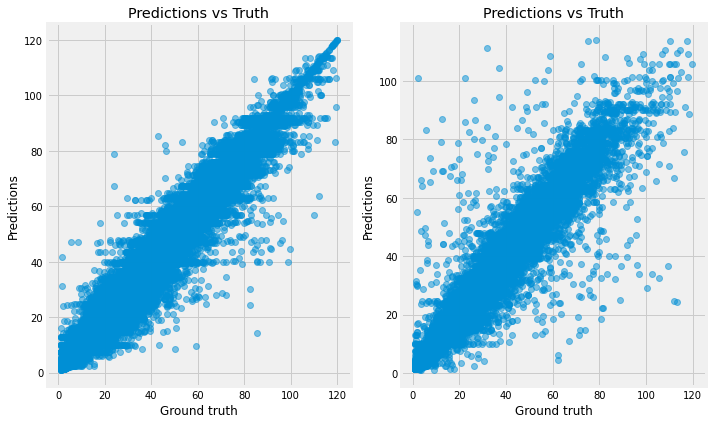

In [ ]:
fig, axList = plt.subplots(nrows=1, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 6)

# axList[-1].axis('off')

data = [[y_train, y_train_pred], [y_test, y_test_pred]]
for ax, y_value in zip(axList, data):
    ax.scatter(y_value[0], y_value[1], alpha=.5)

    ax.set(xlabel='Ground truth', 
        ylabel='Predictions',
        title='Predictions vs Truth')
plt.tight_layout()

In [ ]:
errors.append(pd.Series({'train': r2_score(y_train_pred, y_train),
           'val': r2_score(y_val_pred, y_val),
           'test' : r2_score(y_test_pred, y_test)},
          name='dtree_score'))

errors.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred, squared=False),
           'val': mean_squared_error(y_val_pred, y_val, squared=False),
           'test' : mean_squared_error(y_test,  y_test_pred, squared=False)},
          name='dtree_rmse'))

In [ ]:
# errors.pop(len(errors)-1)

In [ ]:
pd.concat(errors, axis=1)

,base_model_score,base_model_rmse,LR_score,LR_rmse,Ridge_score,Ridge_rmse,SVR_Score,SVR_rmse,dtree_score,dtree_rmse
train,0.975474,1.682308,0.974858,1.682308,0.974853,1.682334,0.965772,1.942387,0.980614,1.481377
val,0.975482,1.689984,0.974806,1.689984,0.974793,1.690284,0.965971,1.943038,0.968315,1.900300
test,0.974501,1.718651,0.973900,1.718650,0.973905,1.718381,0.965174,1.964893,0.968758,1.882509


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor

In [ ]:
rfc_estimator = Pipeline([('preparation', transformer), 
                     ('model', RandomForestRegressor(random_state=42, n_estimators=5, verbose=10, n_jobs=-1, max_depth=13))
                     ])

In [ ]:
rfc_estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preparation', 'model', 'preparation__n_jobs', 'preparation__remainder', 'preparation__sparse_threshold', 'preparation__transformer_weights', 'preparation__transformers', 'preparation__verbose', 'preparation__num_pipe', 'preparation__cat_pipe', 'preparation__num_pipe__memory', 'preparation__num_pipe__steps', 'preparation__num_pipe__verbose', 'preparation__num_pipe__num', 'preparation__num_pipe__pca', 'preparation__num_pipe__poly', 'preparation__num_pipe__num__clip', 'preparation__num_pipe__num__copy', 'preparation__num_pipe__num__feature_range', 'preparation__num_pipe__pca__copy', 'preparation__num_pipe__pca__iterated_power', 'preparation__num_pipe__pca__n_components', 'preparation__num_pipe__pca__random_state', 'preparation__num_pipe__pca__svd_solver', 'preparation__num_pipe__pca__tol', 'preparation__num_pipe__pca__whiten', 'preparation__num_pipe__poly__degree', 'preparation__num_pipe__poly__include_bias', 'preparation__num_pipe__poly__interact

In [ ]:
rfc_estimator.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 5
building tree 2 of 5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.5min


building tree 3 of 5
building tree 4 of 5


[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  8.9min remaining:  6.0min


building tree 5 of 5


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 12.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 12.2min finished


Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('num',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=11,
                                                                       random_state=42)),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat',
                                                                   OrdinalEncoder())]),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_depth=13, n_estimators=5, n_jobs=-1,
                                       random_state=42, verbose=10))])

In [ ]:
rfc_estimator.n_features_in_, rfc_estimator.named_steps.model.n_features_in_

(14, 79)

In [ ]:
rfc_estimator.named_steps.model.n_features_in_

79

In [ ]:
# predict
y_train_pred = rfc_estimator.predict(X_train)
y_val_pred = rfc_estimator.predict(X_val)
y_test_pred = rfc_estimator.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done   3 out of   5 | elapsed:    0.7s remaining:    0.5s
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done   3 out of   5 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done   3 out of   5 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=2)]: Done   5 out of

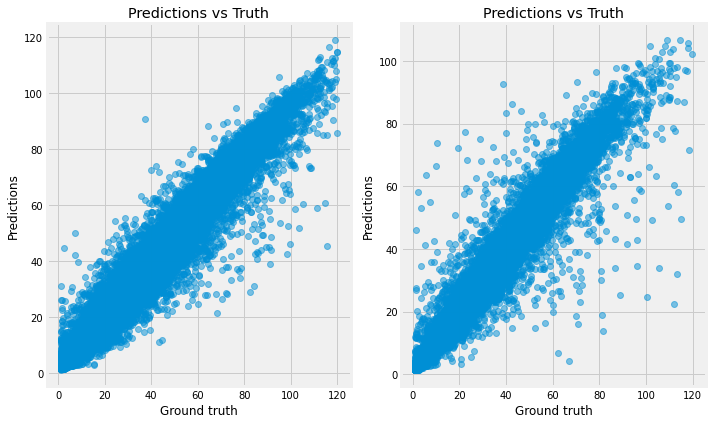

In [ ]:
fig, axList = plt.subplots(nrows=1, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 6)

# axList[-1].axis('off')

data = [[y_train, y_train_pred], [y_test, y_test_pred]]
for ax, y_value in zip(axList, data):
    ax.scatter(y_value[0], y_value[1], alpha=.5)

    ax.set(xlabel='Ground truth', 
        ylabel='Predictions',
        title='Predictions vs Truth')
plt.tight_layout()

In [ ]:
errors.append(pd.Series({'train': r2_score(y_train_pred, y_train),
           'val': r2_score(y_val_pred, y_val),
           'test' : r2_score(y_test_pred, y_test)},
          name='RFC_score'))

errors.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred, squared=False),
           'val': mean_squared_error(y_val_pred, y_val, squared=False),
           'test' : mean_squared_error(y_test,  y_test_pred, squared=False)},
          name='RFC_rmse'))

In [ ]:
pd.concat(errors, axis=1)

,base_model_score,base_model_rmse,LR_score,LR_rmse,Ridge_score,Ridge_rmse,SVR_Score,SVR_rmse,dtree_score,dtree_rmse,RFC_score,RFC_rmse
train,0.975474,1.682308,0.974858,1.682308,0.974853,1.682334,0.965772,1.942387,0.980614,1.481377,0.985411,1.278809
val,0.975482,1.689984,0.974806,1.689984,0.974793,1.690284,0.965971,1.943038,0.968315,1.900300,0.978431,1.558051
test,0.974501,1.718651,0.973900,1.718650,0.973905,1.718381,0.965174,1.964893,0.968758,1.882509,0.978638,1.548085


### Extra Tree Regressor

In [ ]:
etc_estimator = Pipeline([('preparation', transformer), 
                     ('model', ExtraTreesRegressor(random_state=42, n_estimators=5, verbose=10, n_jobs=-1, max_depth=13))
                     ])

In [ ]:
etc_estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preparation', 'model', 'preparation__n_jobs', 'preparation__remainder', 'preparation__sparse_threshold', 'preparation__transformer_weights', 'preparation__transformers', 'preparation__verbose', 'preparation__num_pipe', 'preparation__cat_pipe', 'preparation__num_pipe__memory', 'preparation__num_pipe__steps', 'preparation__num_pipe__verbose', 'preparation__num_pipe__num', 'preparation__num_pipe__pca', 'preparation__num_pipe__poly', 'preparation__num_pipe__num__clip', 'preparation__num_pipe__num__copy', 'preparation__num_pipe__num__feature_range', 'preparation__num_pipe__pca__copy', 'preparation__num_pipe__pca__iterated_power', 'preparation__num_pipe__pca__n_components', 'preparation__num_pipe__pca__random_state', 'preparation__num_pipe__pca__svd_solver', 'preparation__num_pipe__pca__tol', 'preparation__num_pipe__pca__whiten', 'preparation__num_pipe__poly__degree', 'preparation__num_pipe__poly__include_bias', 'preparation__num_pipe__poly__interact

In [ ]:
etc_estimator.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 5
building tree 2 of 5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min


building tree 3 of 5
building tree 4 of 5


[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.2min remaining:  1.5min


building tree 5 of 5


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.9min finished


Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('num',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=11,
                                                                       random_state=42)),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat',
                                                                   OrdinalEncoder())]),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model',
                 ExtraTreesRegressor(max_depth=13, n_estimators=5, n_jobs=-1,
                                     random_state=42, verbose=10))])

In [ ]:
etc_estimator.n_features_in_, etc_estimator.named_steps.model.n_features_in_

(14, 79)

In [ ]:
etc_estimator.named_steps.model.n_features_in_

79

In [ ]:
# predict
y_train_pred = etc_estimator.predict(X_train)
y_val_pred = etc_estimator.predict(X_val)
y_test_pred = etc_estimator.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done   3 out of   5 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done   3 out of   5 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done   3 out of   5 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=2)]: Done   5 out of

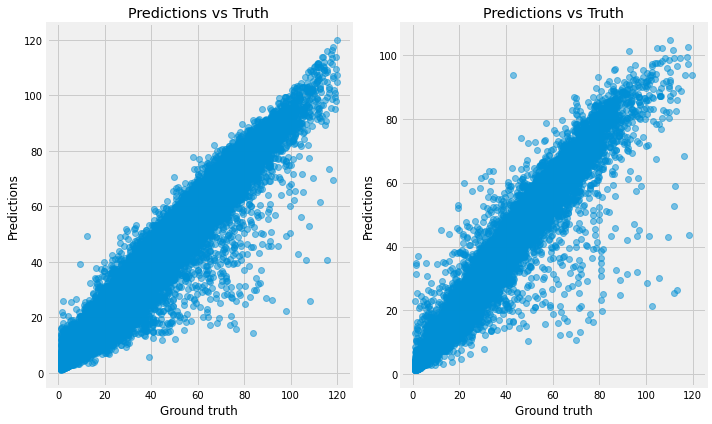

In [ ]:
fig, axList = plt.subplots(nrows=1, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 6)

# axList[-1].axis('off')

data = [[y_train, y_train_pred], [y_test, y_test_pred]]
for ax, y_value in zip(axList, data):
    ax.scatter(y_value[0], y_value[1], alpha=.5)

    ax.set(xlabel='Ground truth', 
        ylabel='Predictions',
        title='Predictions vs Truth')
plt.tight_layout()

In [ ]:
errors.append(pd.Series({'train': r2_score(y_train_pred, y_train),
           'val': r2_score(y_val_pred, y_val),
           'test' : r2_score(y_test_pred, y_test)},
          name='ETC_score'))

errors.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred, squared=False),
           'val': mean_squared_error(y_val_pred, y_val, squared=False),
           'test' : mean_squared_error(y_test,  y_test_pred, squared=False)},
          name='ETC_rmse'))

In [ ]:
pd.concat(errors, axis=1)

,base_model_score,base_model_rmse,LR_score,LR_rmse,ETC_score,ETC_rmse
train,0.975474,1.682308,0.974858,1.682308,0.979301,1.495539
val,0.975482,1.689984,0.974806,1.689984,0.972353,1.729732
test,0.974501,1.718651,0.973900,1.718650,0.973335,1.697847
